In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
raw_data = pd.read_csv("gas_turbines.csv")
raw_data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
raw_data.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [6]:
raw_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
raw_data.duplicated().sum()

0

In [8]:
raw_data.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [9]:
raw_data.corr().style.background_gradient(cmap='coolwarm')


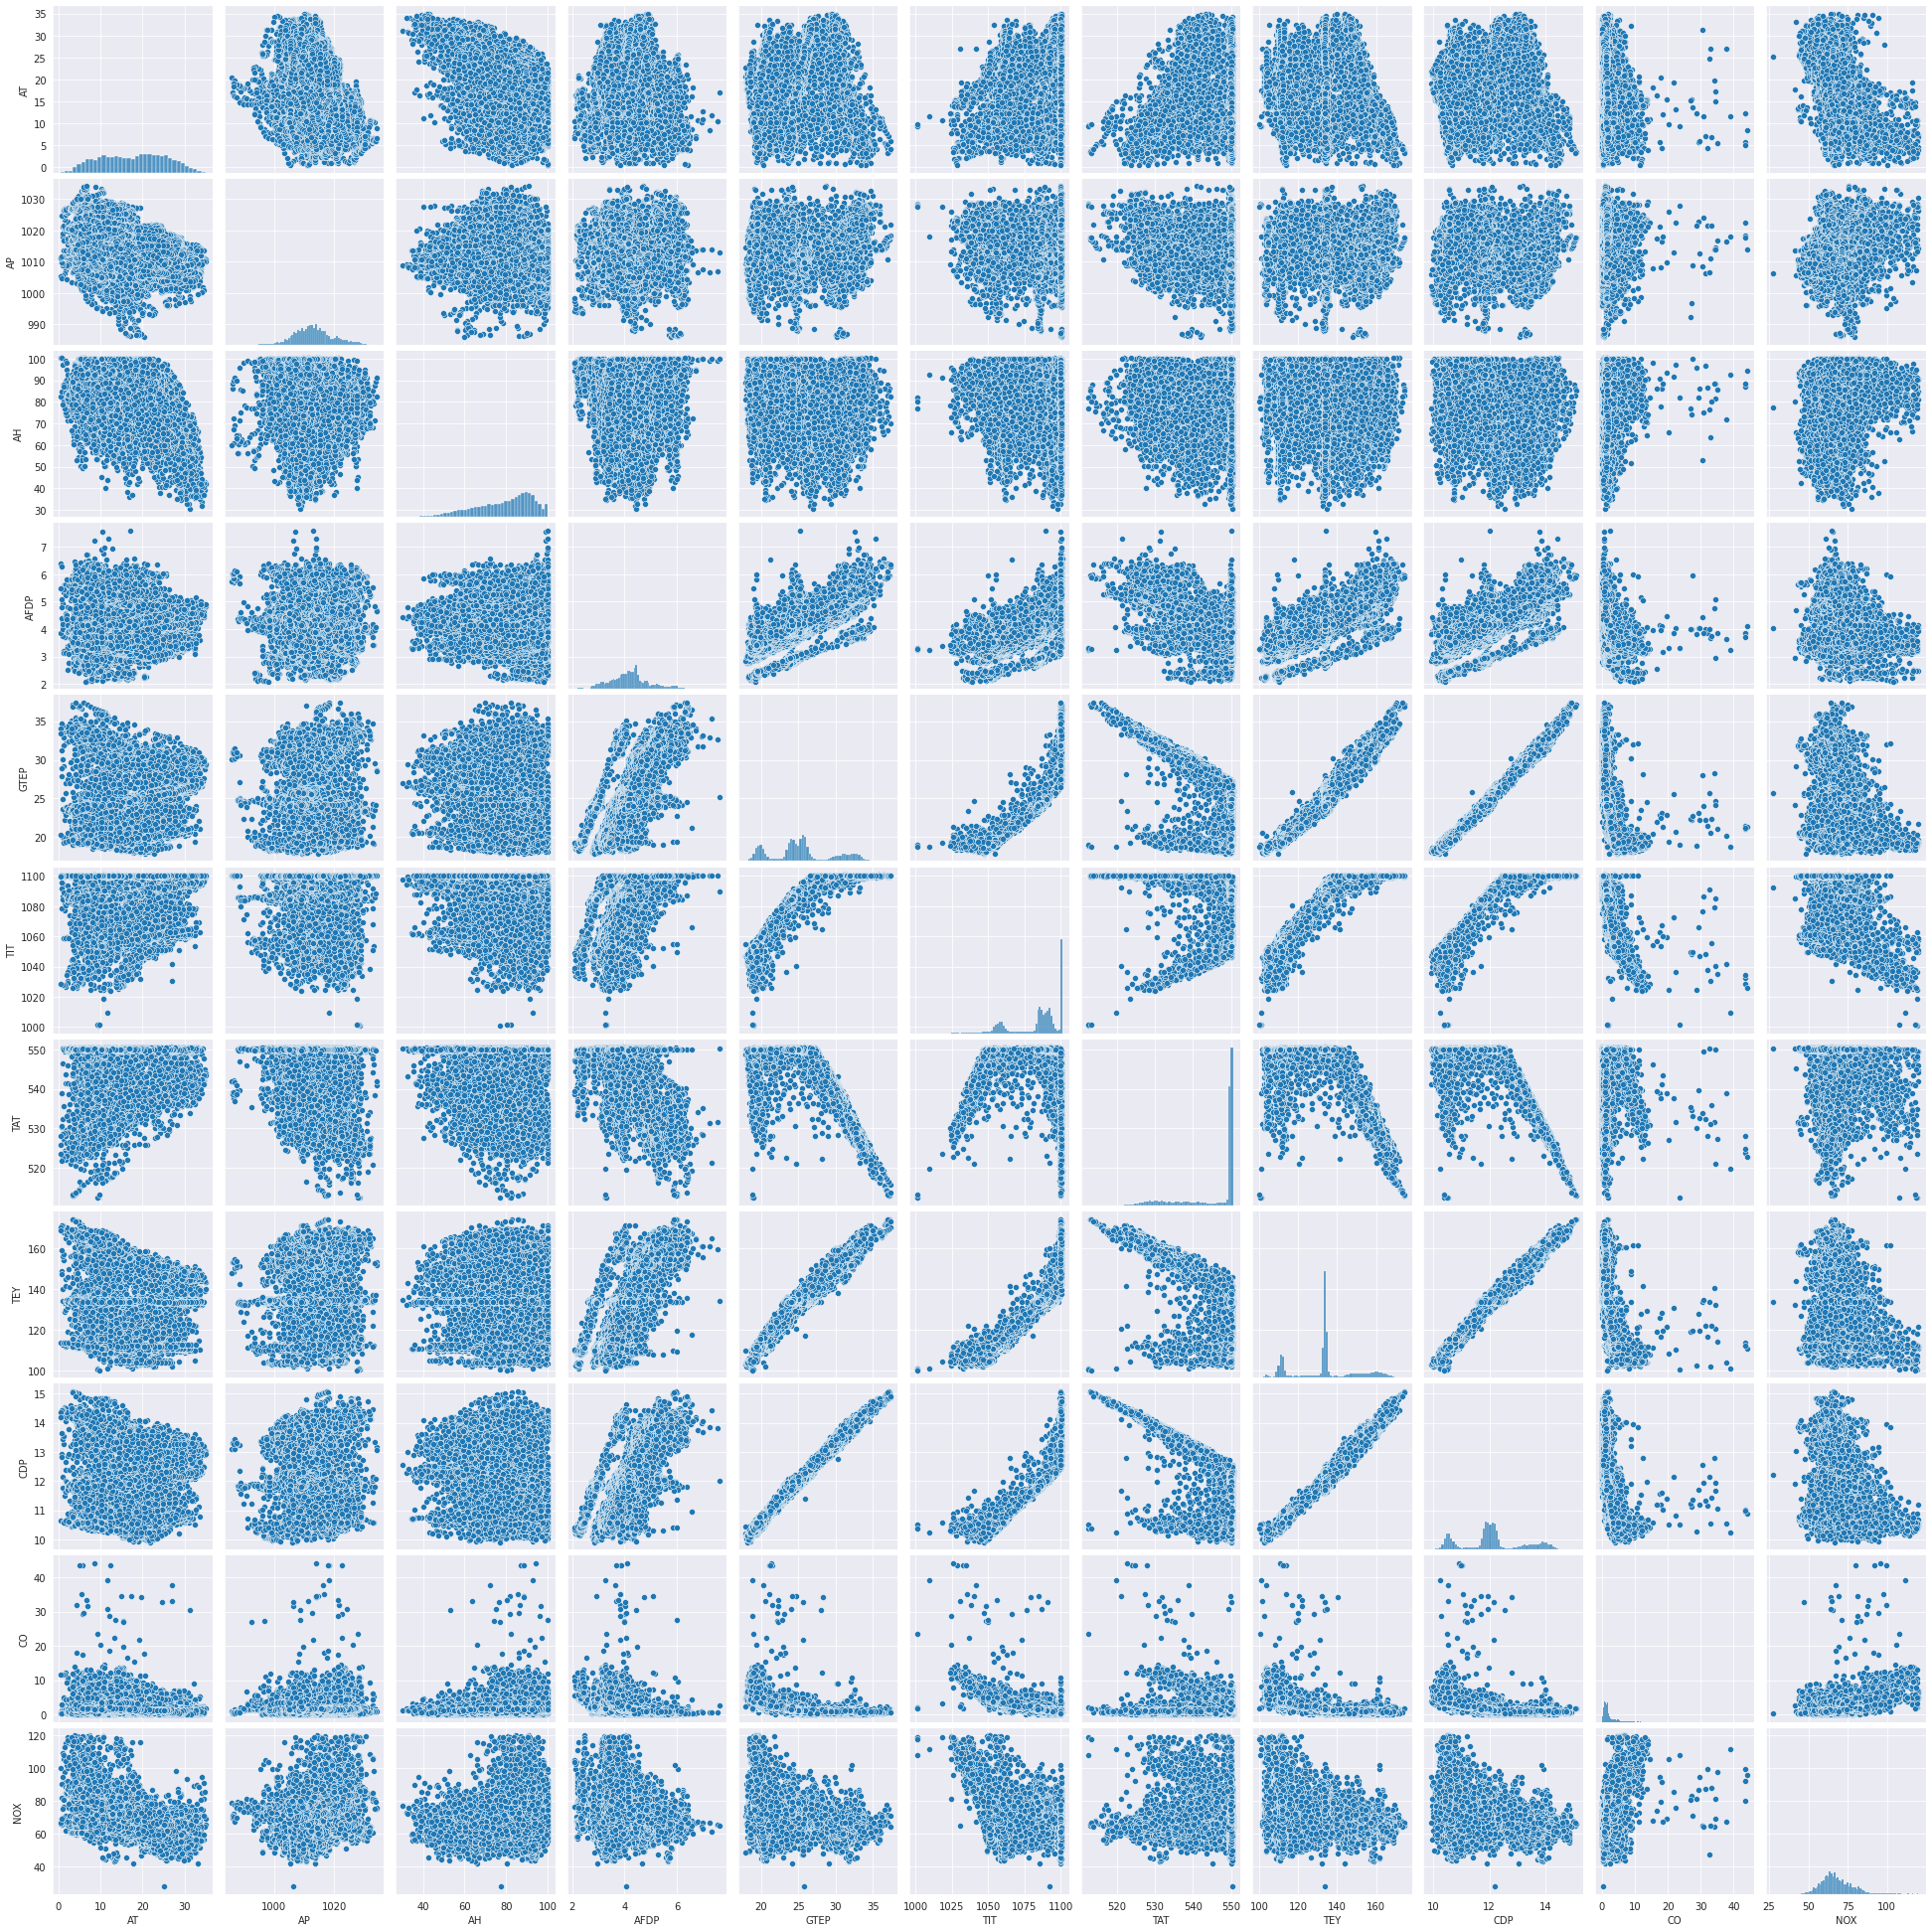

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(raw_data)

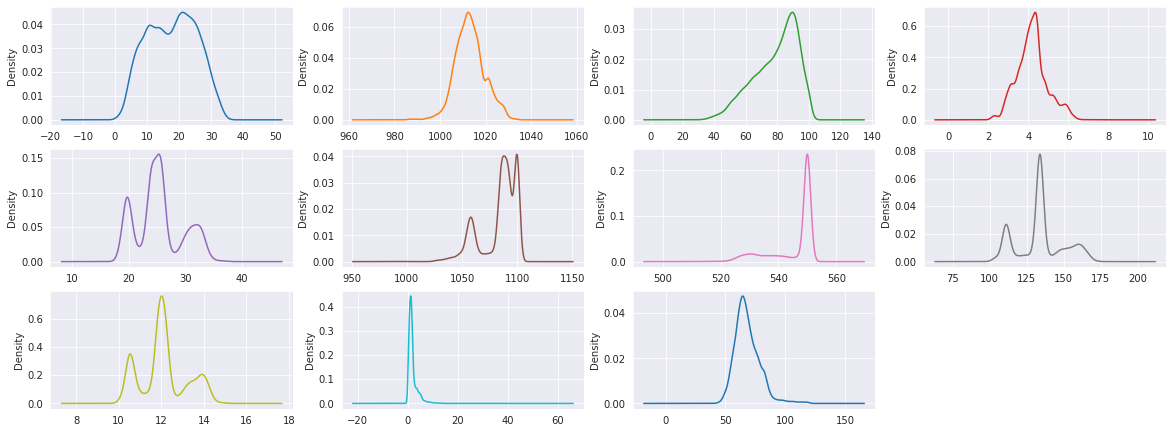

In [11]:
# density
raw_data.plot(kind='density',
             figsize=(20, 10),
             subplots=True,
             layout=(4, 4),
             sharex=False,
             legend=False)
plt.show()

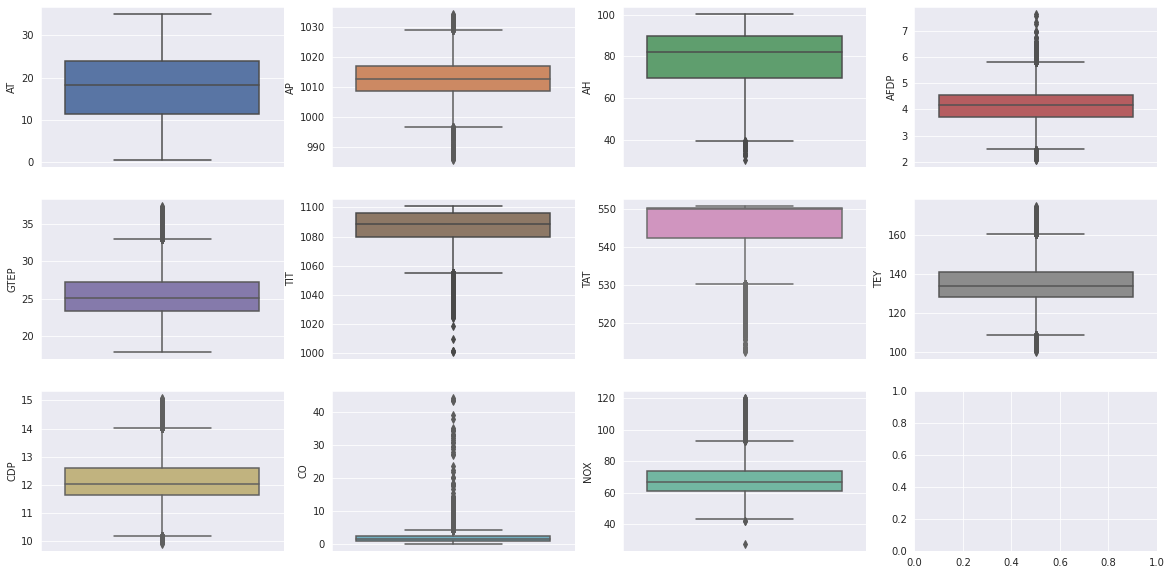

In [12]:
color_palette = sns.color_palette("deep") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

fig, axes = plt.subplots(3, 4,figsize=(20,10))
axe = axes.flatten()

for i,feature in enumerate(raw_data.columns):
    sns.boxplot(data=raw_data, y=feature, ax=axe[i], color=color_palette[i])    
plt.show()

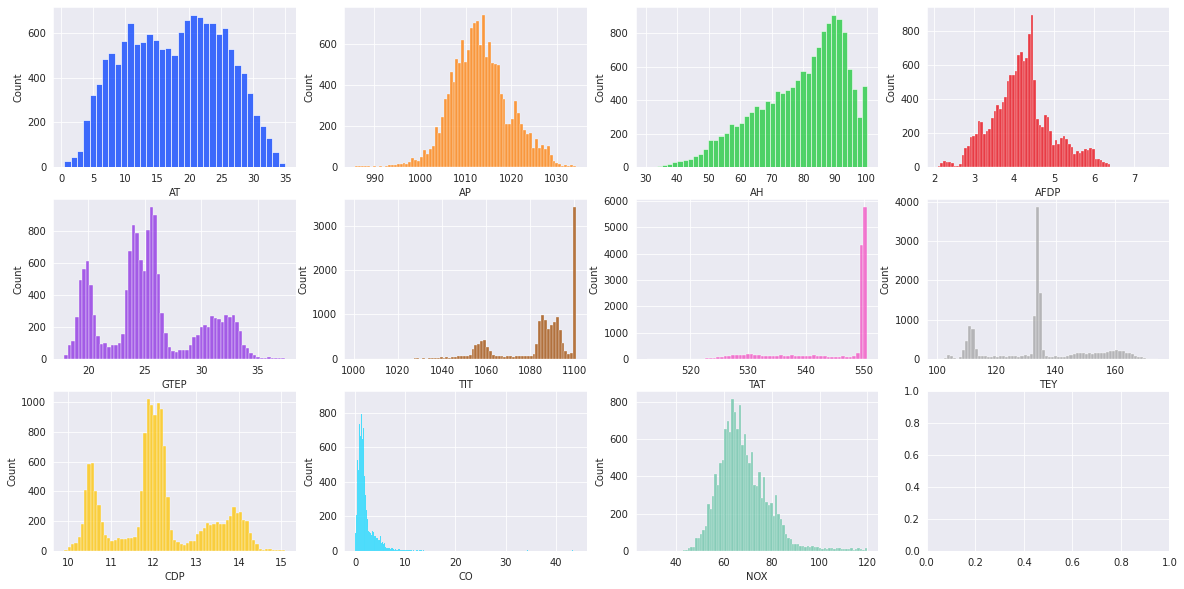

In [13]:
color_palette = sns.color_palette("bright") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

fig, axes = plt.subplots(3, 4,figsize=(20,10))
axe = axes.flatten()

for i,feature in enumerate(raw_data.columns):
    sns.histplot(data=raw_data, x=feature, ax=axe[i], color=color_palette[i])    
plt.show()

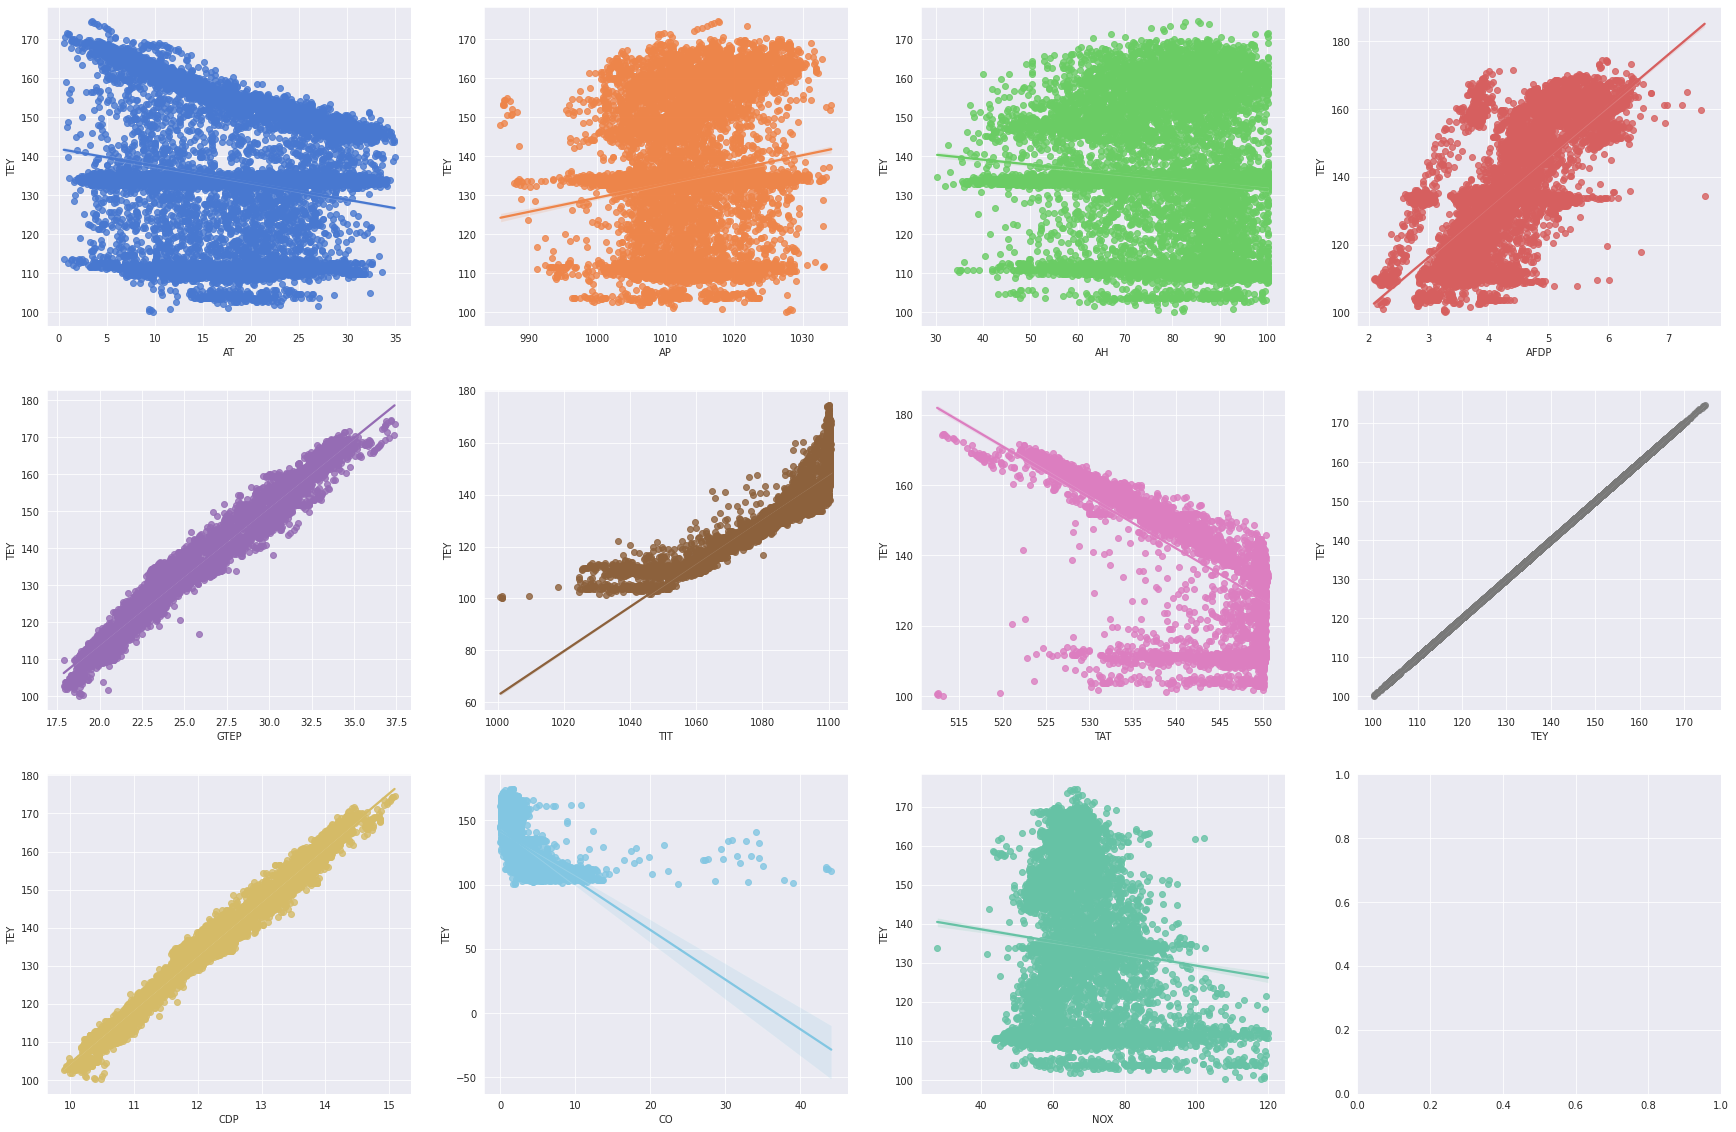

In [14]:
fig, axes = plt.subplots(3,4,figsize=(30,20))
axe = axes.flatten()
color_palette = sns.color_palette("muted") + sns.color_palette("Set2") + sns.color_palette("husl", 25)

for i,feature in enumerate(raw_data):
    sns.regplot(data=raw_data, x=feature, y="TEY", color=color_palette[i], ax=axe[i])
plt.show()

In [15]:
data = raw_data.copy()

In [16]:
X = data.drop('TEY', axis=1)
Y = data[["TEY"]]

In [17]:
from sklearn.model_selection import train_test_split

seed = 7
validation_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [19]:
X_train_norm

array([[0.38596262, 0.83592939, 0.5932776 , ..., 0.9009002 , 0.02733   ,
        0.41385075],
       [0.4917269 , 0.19480789, 0.69371278, ..., 0.08182977, 0.09713604,
        0.44262687],
       [0.26369283, 0.40186916, 0.88194285, ..., 0.36039099, 0.02996496,
        0.53657531],
       ...,
       [0.09204021, 0.71754933, 0.89683062, ..., 0.34532319, 0.04167035,
        0.70348982],
       [0.28278504, 0.59501558, 0.97623683, ..., 0.37429973, 0.03175864,
        0.52814111],
       [0.60179267, 0.42886812, 0.7774708 , ..., 0.11119267, 0.05077706,
        0.31620081]])

In [20]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

In [21]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='linear')) #4rd layer or output layer

In [22]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mean_absolute_error'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train_norm, Y_train, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
806/806 [==============================] - 3s 2ms/step - loss: 6431.5107 - mean_absolute_error: 58.0047 - val_loss: 31.4655 - val_mean_absolute_error: 4.4266
Epoch 2/250
806/806 [==============================] - 2s 2ms/step - loss: 25.4454 - mean_absolute_error: 3.9833 - val_loss: 22.1529 - val_mean_absolute_error: 3.7553
Epoch 3/250
806/806 [==============================] - 2s 2ms/step - loss: 20.2122 - mean_absolute_error: 3.5678 - val_loss: 17.6995 - val_mean_absolute_error: 3.3421
Epoch 4/250
806/806 [==============================] - 2s 2ms/step - loss: 16.6322 - mean_absolute_error: 3.2477 - val_loss: 14.6337 - val_mean_absolute_error: 3.0610
Epoch 5/250
806/806 [==============================] - 2s 2ms/step - loss: 13.7993 - mean_absolute_error: 2.9549 - val_loss: 14.9190 - val_mean_absolute_error: 3.1628
Epoch 6/250
806/806 [==============================] - 2s 2ms/step - loss: 11.3150 - mean_absolute_error: 2.6681 - val_loss: 9.8609 - val_mean_absolute_error: 2.5

In [25]:
# evaluate the model
scores = model.evaluate(X_train_norm, Y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 1ms/step - loss: 0.4671 - mean_absolute_error: 0.5047
mean_absolute_error: 50.47%


In [26]:
history.history.keys()


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [31]:
predictions = model.predict(X_test_norm)
predictions

94/94 [==============================] - 1s 2ms/step


array([[159.92047],
       [155.219  ],
       [151.96378],
       ...,
       [127.42523],
       [133.59322],
       [167.93549]], dtype=float32)

In [32]:
predictions_df = pd.DataFrame(X_test)
predictions_df['Actual'] = Y_test
predictions_df['Predicted'] = predictions
print(predictions_df.shape)
predictions_df.head(10)

(3008, 12)


AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
7118    8.1562  1014.7  99.377  3.6987  30.976  1100.0  532.81  13.717   
2711   15.2450  1012.5  94.376  5.2203  30.745  1100.1  534.81  13.617   
2018   21.6210  1008.2  63.991  5.9198  31.337  1099.9  536.56  13.444   
2091   16.1450  1014.4  84.056  4.8387  24.430  1085.9  549.96  11.901   
11369  24.5100  1011.5  46.377  2.9141  18.828  1051.7  550.13  10.288   
14751  12.5710  1013.9  78.673  3.7505  22.632  1076.3  549.89  11.414   
12784  21.9700  1013.8  83.822  3.1796  20.045  1060.0  549.96  10.699   
2086   22.9450  1014.6  54.473  5.0225  25.393  1090.5  550.43  12.029   
14036   7.0773  1021.2  93.772  3.3258  19.310  1046.6  542.29  10.520   
10003  18.2200  1005.1  79.001  4.4987  31.276  1100.2  534.88  13.655   

            CO      NOX  Actual   Predicted  
7118   0.77150   68.479  160.05  159.920471  
2711   1.15480   66.743  156.00  155.218994  
2018   0.72207   75.405  153.15  151.963776  
2091   1.50380   69.729  132.54  132.895294  
11369  2.62610   62.537  105.31  105.519608  
14751  2.31990   77.612  126.69  127.180428  
12784  1.86120   53.714  111.81  112.295731  
2086   1.43610   74.199  133.70  133.159348  
14036  6.91880  105.420  112.26  111.943169  
10003  0.95803   64.014  156.78  155.744888

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(Y_test, predictions))
print("MSE:", mean_squared_error(Y_test, predictions))
print("R^2:", r2_score(Y_test, predictions)*100)

MAE: 0.5094310983698419
MSE: 0.4695553006621114
R^2: 99.80676064426905
